In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from keras.datasets import mnist, fashion_mnist
import tensorflow as tf
from learn import get_feature_model
from features.settings import Baseline_Settings, Triplet_Hinge_Settings
from features.models import CNNSmall1, GCNNMedium0
import pandas as pd
from sklearn.manifold import TSNE
from ggplot import *

/home/dqi/.conda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/dqi/.conda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/dqi/.conda/envs/py36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/dqi/.conda/envs/py36/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functio

In [2]:
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))

X_true = np.concatenate(
    (x_train[y_train==0][:1000], 
     x_train[y_train==1][:1000], 
     x_train[y_train==2][:1000], 
     x_train[y_train==3][:1000], 
     x_train[y_train==4][:1000], 
     x_train[y_train==5][:1000], 
     x_train[y_train==6][:1000], 
     x_train[y_train==7][:1000], 
     x_train[y_train==8][:1000],
     x_train[y_train==9][:1000]), axis=0).astype('float64')
Y_true = np.concatenate(
    (y_train[y_train==0][:1000], 
     y_train[y_train==1][:1000], 
     y_train[y_train==2][:1000], 
     y_train[y_train==3][:1000], 
     y_train[y_train==4][:1000], 
     y_train[y_train==5][:1000], 
     y_train[y_train==6][:1000], 
     y_train[y_train==7][:1000], 
     y_train[y_train==8][:1000],
     y_train[y_train==9][:1000]), axis=0)

INFO:tensorflow:Restoring parameters from ./models/b_cs1_mnist_10.ckpt
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 0.795s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 195.823322
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.451996
[t-SN

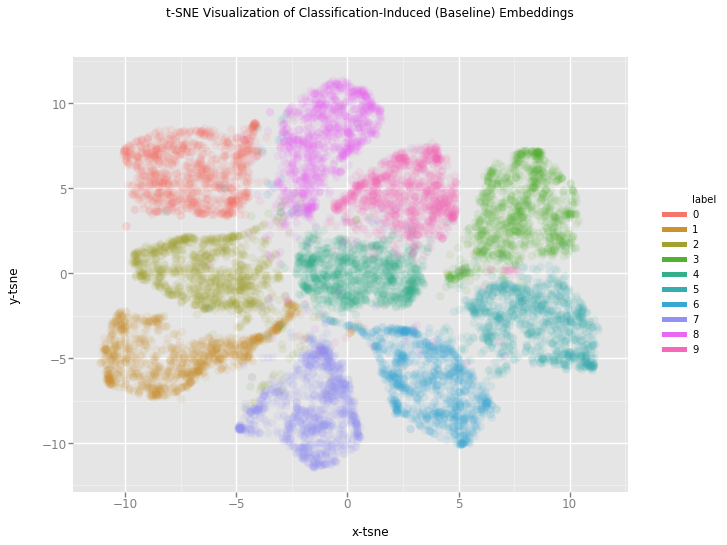

<ggplot: (-9223369044811031436)>

In [3]:
tf.reset_default_graph()
f, f_params = get_feature_model(feature_model=CNNSmall1, settings=Baseline_Settings,
                                num_features=10, data_format=[28, 28, 1],
                                f_lr=0.07, f_reg=0.001, f_scope="b_cs1_mnist_10")
fs = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, "b_cs1_mnist_10"))

def fun(X, Y):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        fs.restore(sess, "./models/b_cs1_mnist_10.ckpt")
        x, y, dropout, f_training = f_params
        X = sess.run(f.features, feed_dict={x:X, dropout:1.0, f_training:False})

        feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

        df = pd.DataFrame(X,columns=feat_cols)
        df['label'] = Y
        df['label'] = df['label'].apply(lambda i: str(i))

        X, Y = None, None

        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(df.values)

        df_tsne = df.copy()
        df_tsne['x-tsne'] = tsne_results[:,0]
        df_tsne['y-tsne'] = tsne_results[:,1]
        return df_tsne

df_tsne = fun(X_true, Y_true)
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("t-SNE Visualization of Classification-Induced (Baseline) Embeddings")
chart

INFO:tensorflow:Restoring parameters from ./models/f_cs1_mnist_10.ckpt
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 0.514s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 10.122685
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.551422
[t-SNE

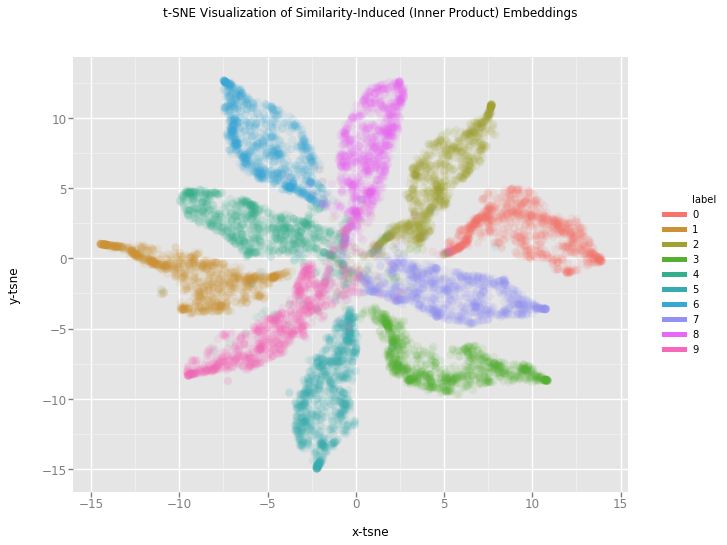

<ggplot: (2992128812264)>

In [4]:
tf.reset_default_graph()
f, f_params = get_feature_model(feature_model=CNNSmall1, settings=Baseline_Settings,
                                num_features=10, data_format=[28, 28, 1],
                                f_lr=0.07, f_reg=0.001, f_scope="f_cs1_mnist_10")
fs = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, "f_cs1_mnist_10"))

def fun(X, Y):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        fs.restore(sess, "./models/f_cs1_mnist_10.ckpt")
        x, y, dropout, f_training = f_params
        X = sess.run(f.features, feed_dict={x:X, dropout:1.0, f_training:False})

        feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

        df = pd.DataFrame(X,columns=feat_cols)
        df['label'] = Y
        df['label'] = df['label'].apply(lambda i: str(i))

        X, Y = None, None

        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(df.values)

        df_tsne = df.copy()
        df_tsne['x-tsne'] = tsne_results[:,0]
        df_tsne['y-tsne'] = tsne_results[:,1]
        return df_tsne

df_tsne = fun(X_true, Y_true)
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("t-SNE Visualization of Similarity-Induced (Inner Product) Embeddings")
chart

INFO:tensorflow:Restoring parameters from ./models/d_cs1_mnist_10.ckpt
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 0.673s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.264701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.935158
[t-SNE]

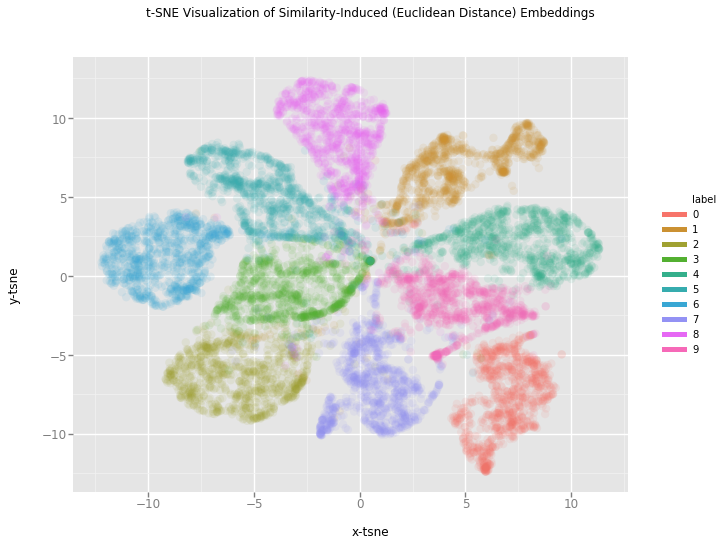

<ggplot: (2992043809144)>

In [5]:
tf.reset_default_graph()
f, f_params = get_feature_model(feature_model=CNNSmall1, settings=Baseline_Settings,
                                num_features=10, data_format=[28, 28, 1],
                                f_lr=0.07, f_reg=0.001, f_scope="d_cs1_mnist_10")
fs = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, "d_cs1_mnist_10"))

def fun(X, Y):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        fs.restore(sess, "./models/d_cs1_mnist_10.ckpt")
        x, y, dropout, f_training = f_params
        X = sess.run(f.features, feed_dict={x:X, dropout:1.0, f_training:False})

        feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

        df = pd.DataFrame(X,columns=feat_cols)
        df['label'] = Y
        df['label'] = df['label'].apply(lambda i: str(i))

        X, Y = None, None

        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(df.values)

        df_tsne = df.copy()
        df_tsne['x-tsne'] = tsne_results[:,0]
        df_tsne['y-tsne'] = tsne_results[:,1]
        return df_tsne

df_tsne = fun(X_true, Y_true)
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("t-SNE Visualization of Similarity-Induced (Euclidean Distance) Embeddings")
chart

In [2]:
(x_train, y_train), _ = fashion_mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))

X_true = np.concatenate(
    (x_train[y_train==0][:800], 
     x_train[y_train==1][:800], 
     x_train[y_train==2][:800], 
     x_train[y_train==3][:800], 
     x_train[y_train==4][:800], 
     x_train[y_train==5][:800], 
     x_train[y_train==6][:800], 
     x_train[y_train==7][:800], 
     x_train[y_train==8][:800],
     x_train[y_train==9][:800]), axis=0).astype('float64')
Y_true = np.concatenate(
    (y_train[y_train==0][:800], 
     y_train[y_train==1][:800], 
     y_train[y_train==2][:800], 
     y_train[y_train==3][:800], 
     y_train[y_train==4][:800], 
     y_train[y_train==5][:800], 
     y_train[y_train==6][:800], 
     y_train[y_train==7][:800], 
     y_train[y_train==8][:800],
     y_train[y_train==9][:800]), axis=0)

INFO:tensorflow:Restoring parameters from ./models/fmnist/b_gm0_fmnist_10.ckpt
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.005s...
[t-SNE] Computed neighbors for 8000 samples in 0.589s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 22.237405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.961533
[t-SNE] Error after 300 iterations: 2.366699


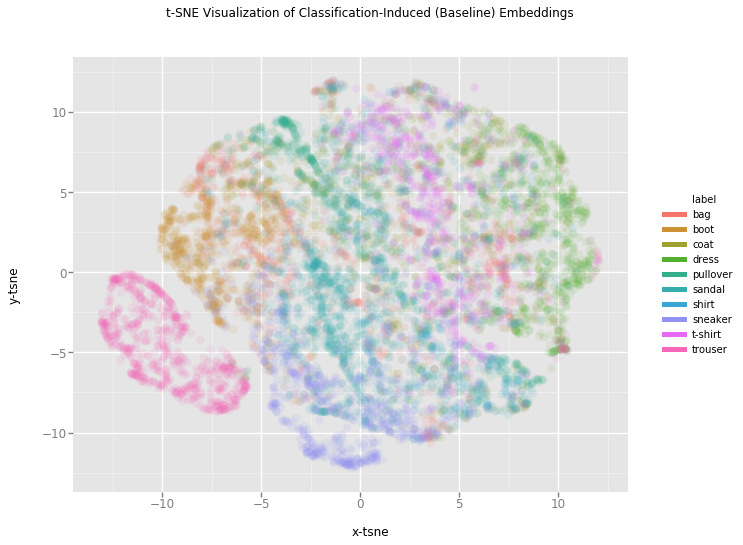

<ggplot: (-9223369078872258090)>

In [3]:
tf.reset_default_graph()
f, f_params = get_feature_model(feature_model=GCNNMedium0, settings=Baseline_Settings,
                                num_features=10, data_format=[28, 28, 1],
                                f_lr=0.07, f_reg=0.001, f_scope="b_gm0_fmnist_10")
fs = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, "b_gm0_fmnist_10"))

def fun(X, Y):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        fs.restore(sess, "./models/fmnist/b_gm0_fmnist_10.ckpt")
        x, y, dropout, f_training = f_params
        X = sess.run(f.features, feed_dict={x:X, dropout:1.0, f_training:False})

        feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

        df = pd.DataFrame(X,columns=feat_cols)
        df['label'] = Y
        df['label'] = df['label'].apply(lambda i: str(i))

        X, Y = None, None

        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(df.values)
        
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
        df['label'] = df['label'].apply(lambda i: labels[int(i)])

        df_tsne = df.copy()
        df_tsne['x-tsne'] = tsne_results[:,0]
        df_tsne['y-tsne'] = tsne_results[:,1]
        return df_tsne

df_tsne = fun(X_true, Y_true)
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("t-SNE Visualization of Classification-Induced (Baseline) Embeddings")
chart

INFO:tensorflow:Restoring parameters from ./models/fmnist/f_cm0_fmnist_10.ckpt
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.004s...
[t-SNE] Computed neighbors for 8000 samples in 0.691s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 12.043343
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.082092
[t-SNE] Error after 300 iterations: 2.394598


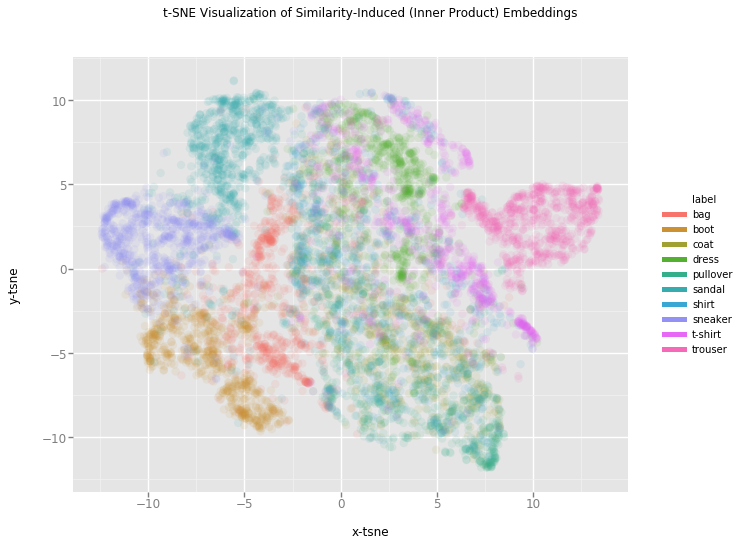

<ggplot: (-9223369039069864469)>

In [12]:
tf.reset_default_graph()
f, f_params = get_feature_model(feature_model=GCNNMedium0, settings=Triplet_Hinge_Settings,
                                num_features=10, data_format=[28, 28, 1],
                                f_lr=0.07, f_reg=0.001, f_scope="f_cm0_fmnist_10")
fs = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, "f_cm0_fmnist_10"))

def fun(X, Y):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        fs.restore(sess, "./models/fmnist/f_cm0_fmnist_10.ckpt")
        x, y, dropout, f_training = f_params
        X = sess.run(f.features, feed_dict={x:X, dropout:1.0, f_training:False})

        feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
        df = pd.DataFrame(X,columns=feat_cols)
        df['label'] = Y
        df['label'] = df['label'].apply(lambda i: str(i))

        X, Y = None, None

        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(df.values)
        
        df['label'] = df['label'].apply(lambda i: labels[int(i)])

        df_tsne = df.copy()
        df_tsne['x-tsne'] = tsne_results[:,0]
        df_tsne['y-tsne'] = tsne_results[:,1]
        return df_tsne

df_tsne = fun(X_true, Y_true)
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("t-SNE Visualization of Similarity-Induced (Inner Product) Embeddings")
chart

INFO:tensorflow:Restoring parameters from ./models/fmnist/d_gm0_fmnist_10.ckpt
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.005s...
[t-SNE] Computed neighbors for 8000 samples in 0.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 4.247279
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.440079
[t-SNE] Error after 300 iterations: 2.276001


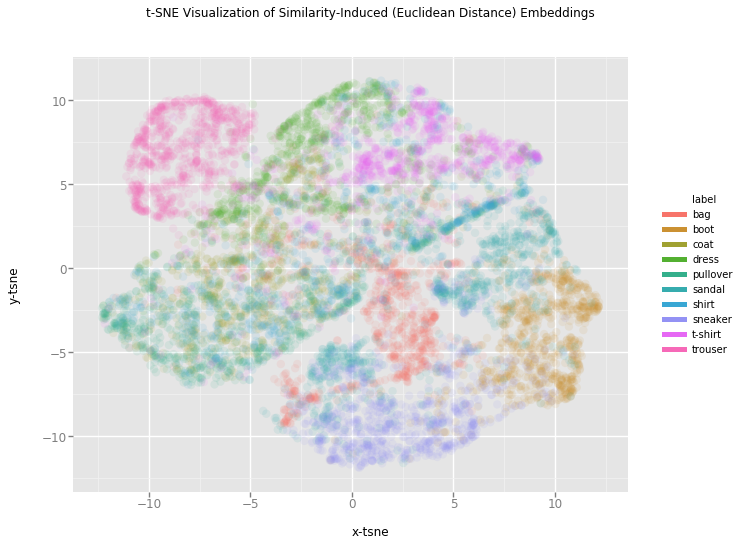

<ggplot: (-9223369039276814364)>

In [11]:
tf.reset_default_graph()
f, f_params = get_feature_model(feature_model=GCNNMedium0, settings=Baseline_Settings,
                                num_features=10, data_format=[28, 28, 1],
                                f_lr=0.07, f_reg=0.001, f_scope="d_gm0_fmnist_10")
fs = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, "d_gm0_fmnist_10"))

def fun(X, Y):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        fs.restore(sess, "./models/fmnist/d_gm0_fmnist_10.ckpt")
        x, y, dropout, f_training = f_params
        X = sess.run(f.features, feed_dict={x:X, dropout:1.0, f_training:False})

        feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

        df = pd.DataFrame(X,columns=feat_cols)
        df['label'] = Y
        df['label'] = df['label'].apply(lambda i: str(i))

        X, Y = None, None

        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(df.values)

        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
        df['label'] = df['label'].apply(lambda i: labels[int(i)])
        
        df_tsne = df.copy()
        df_tsne['x-tsne'] = tsne_results[:,0]
        df_tsne['y-tsne'] = tsne_results[:,1]
        return df_tsne

df_tsne = fun(X_true, Y_true)
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("t-SNE Visualization of Similarity-Induced (Euclidean Distance) Embeddings")
chart